In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from PIL import Image
from scipy.ndimage import measurements, morphology
from scipy import ndimage
from skimage.morphology import disk
import matplotlib.patches as patches

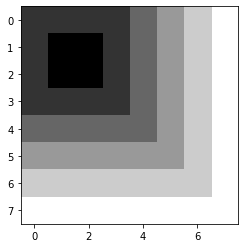

In [2]:
pattern = Image.open('database/pattern_d.tif') #képobjektum
plt.imshow(pattern,'gray')

In [3]:
# pixelek értékei
np.uint8(pattern)

array([[ 40,  40,  40,  40,  80, 120, 160, 200],
       [ 40,   0,   0,  40,  80, 120, 160, 200],
       [ 40,   0,   0,  40,  80, 120, 160, 200],
       [ 40,  40,  40,  40,  80, 120, 160, 200],
       [ 80,  80,  80,  80,  80, 120, 160, 200],
       [120, 120, 120, 120, 120, 120, 160, 200],
       [160, 160, 160, 160, 160, 160, 160, 200],
       [200, 200, 200, 200, 200, 200, 200, 200]], dtype=uint8)

In [4]:
filter = np.array([[-1, -1, 0],[-1, 0, 1],[0, 1, 1]])
pattern_A = filters.convolve(np.int16(pattern), filter) # a convolve metódus defaultként kiegészíti a kép széleit 0-val (mode=reflect és cval=0)
np.int16(pattern_A)

array([[  40,   80,   40,  -80, -160, -160, -160,  -80],
       [  80,  120,    0, -120, -160, -160, -160,  -80],
       [  40,    0, -120, -160, -160, -160, -160,  -80],
       [ -80, -120, -160, -160, -160, -160, -160,  -80],
       [-160, -160, -160, -160, -160, -160, -160,  -80],
       [-160, -160, -160, -160, -160, -160, -160,  -80],
       [-160, -160, -160, -160, -160, -160, -160,  -80],
       [ -80,  -80,  -80,  -80,  -80,  -80,  -80,  -40]], dtype=int16)

In [5]:
pattern_A_limited = np.minimum(np.maximum(pattern_A,0),255)
np.int16(pattern_A_limited)

array([[ 40,  80,  40,   0,   0,   0,   0,   0],
       [ 80, 120,   0,   0,   0,   0,   0,   0],
       [ 40,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=int16)

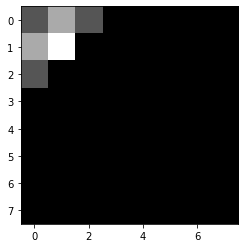

In [6]:
plt.imshow(pattern_A_limited,'gray')

In [7]:
filter = np.array([[0, -1, -1],[1, 0, -1],[1, 1, 1]])
pattern_B = filters.convolve(np.int16(pattern), filter) # a convolve metódus defaultként kiegészíti a kép széleit 0-val (mode=reflect és cval=0)
np.int16(pattern_B)

array([[  40,   80,  120,  160,  200,  240,  280,  240],
       [   0,   40,  160,  200,  200,  240,  280,  240],
       [ -40,  -80,    0,  120,  200,  240,  280,  240],
       [ -80, -120, -120,    0,  160,  240,  280,  240],
       [-120, -120, -120,  -80,   40,  200,  280,  240],
       [ -80,  -80,  -80,  -80,  -40,   80,  240,  240],
       [ -40,  -40,  -40,  -40,  -40,    0,  120,  200],
       [  80,   80,   80,   80,   80,   80,  120,  160]], dtype=int16)

In [8]:
pattern_B_limited = np.minimum(np.maximum(pattern_B,0),255)
np.int16(pattern_B_limited)

array([[ 40,  80, 120, 160, 200, 240, 255, 240],
       [  0,  40, 160, 200, 200, 240, 255, 240],
       [  0,   0,   0, 120, 200, 240, 255, 240],
       [  0,   0,   0,   0, 160, 240, 255, 240],
       [  0,   0,   0,   0,  40, 200, 255, 240],
       [  0,   0,   0,   0,   0,  80, 240, 240],
       [  0,   0,   0,   0,   0,   0, 120, 200],
       [ 80,  80,  80,  80,  80,  80, 120, 160]], dtype=int16)

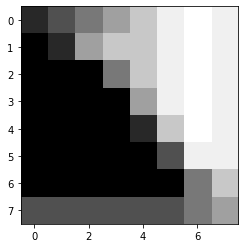

In [9]:
plt.imshow(pattern_B_limited,'gray')

In [10]:
pattern_C = filters.laplace(np.int16(pattern))
np.int16(pattern_C)

array([[  0, -40, -40,  40,   0,   0,   0, -40],
       [-40,  80,  80,   0,   0,   0,   0, -40],
       [-40,  80,  80,   0,   0,   0,   0, -40],
       [ 40,   0,   0,  80,   0,   0,   0, -40],
       [  0,   0,   0,   0,  80,   0,   0, -40],
       [  0,   0,   0,   0,   0,  80,   0, -40],
       [  0,   0,   0,   0,   0,   0,  80, -40],
       [-40, -40, -40, -40, -40, -40, -40,   0]], dtype=int16)

In [11]:
pattern_C_limited = np.minimum(np.maximum(pattern_C,0),255)
np.int16(pattern_C_limited)

array([[ 0,  0,  0, 40,  0,  0,  0,  0],
       [ 0, 80, 80,  0,  0,  0,  0,  0],
       [ 0, 80, 80,  0,  0,  0,  0,  0],
       [40,  0,  0, 80,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 80,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=int16)

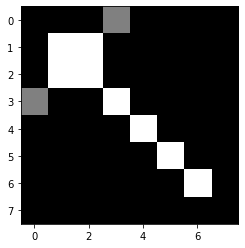

In [12]:
plt.imshow(pattern_C_limited,'gray')

In [13]:
filter = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
pattern_D = filters.convolve(np.int16(pattern), filter)
np.int16(pattern_D)

array([[  40,   80,   80,  -80,    0,    0,    0,  120],
       [  80, -200, -200,  -40,    0,    0,    0,  120],
       [  80, -200, -200,  -40,    0,    0,    0,  120],
       [ -80,  -40,  -40, -160,  -40,    0,    0,  120],
       [   0,    0,    0,  -40, -160,  -40,    0,  120],
       [   0,    0,    0,    0,  -40, -160,  -40,  120],
       [   0,    0,    0,    0,    0,  -40, -160,   80],
       [ 120,  120,  120,  120,  120,  120,   80,   40]], dtype=int16)

In [14]:
pattern_D_limited = np.minimum(np.maximum(pattern_D,0),255)
np.int16(pattern_D_limited)

array([[ 40,  80,  80,   0,   0,   0,   0, 120],
       [ 80,   0,   0,   0,   0,   0,   0, 120],
       [ 80,   0,   0,   0,   0,   0,   0, 120],
       [  0,   0,   0,   0,   0,   0,   0, 120],
       [  0,   0,   0,   0,   0,   0,   0, 120],
       [  0,   0,   0,   0,   0,   0,   0, 120],
       [  0,   0,   0,   0,   0,   0,   0,  80],
       [120, 120, 120, 120, 120, 120,  80,  40]], dtype=int16)

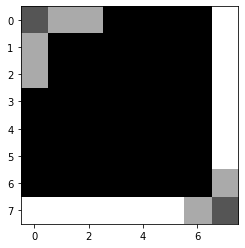

In [15]:
plt.imshow(pattern_D_limited,'gray')

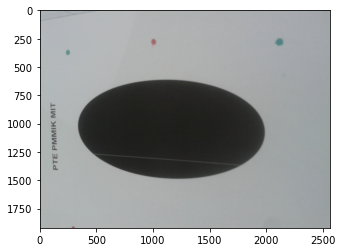

In [16]:
sample = Image.open('database/sample_p.jpg')
plt.imshow(sample,'gray')

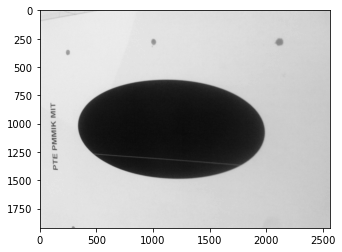

In [17]:
sample_gray = np.array(sample.convert("L"))
plt.imshow(sample_gray,'gray')

(array([[   0.,    0.,    0., ...,    3., 1359.,  558.],
        [   0.,    0.,    0., ...,    2., 1382.,  536.],
        [   0.,    0.,    0., ...,    4., 1331.,  585.],
        ...,
        [   0.,    0.,    0., ..., 1601.,  319.,    0.],
        [   0.,    0.,    0., ..., 1592.,  328.,    0.],
        [   0.,    0.,    0., ..., 1559.,  361.,    0.]]),
 array([ 21. ,  38.8,  56.6,  74.4,  92.2, 110. , 127.8, 145.6, 163.4,
        181.2, 199. ]),
 <a list of 2560 BarContainer objects>)

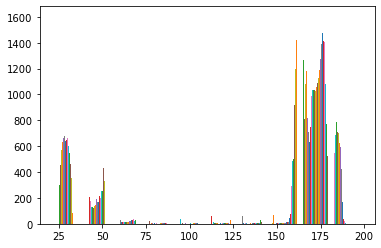

In [18]:
plt.hist(sample_gray)

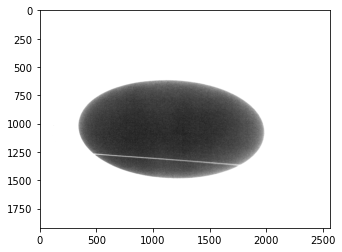

In [19]:
br = 100
con = 2
sample_bc = con * np.int16(sample_gray) + br
sample_bc_limited = np.minimum(np.maximum(sample_bc,0),255)
plt.imshow(sample_bc_limited,'gray')

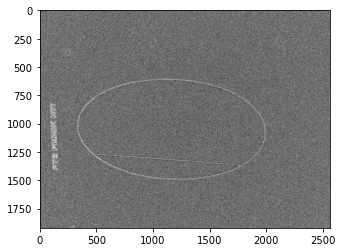

In [20]:
sample_laplace = filters.laplace(sample_gray)
plt.imshow(sample_laplace>10,'gray', vmin = 0, vmax = 1)

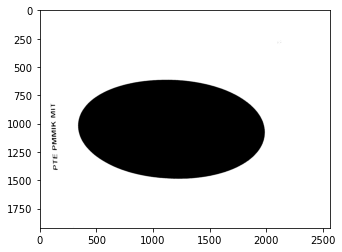

In [21]:
sample_bin = sample_gray > 110
plt.imshow(sample_bin,'gray')

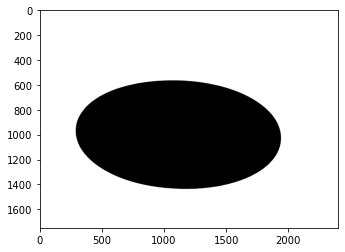

In [22]:
str_elem = np.ones((15,15))
sample_closed = morphology.binary_closing(sample_bin, structure = str_elem)
sample_closed = sample_closed[50:1800:1,50:2450:1]
plt.imshow(sample_closed,'gray')

In [23]:
sumX = 0
sumY = 0
count = 0
for i in range(len(sample_closed)):
    for j in range(len(sample_closed[i])):
        if sample_closed[i,j] == False:
            sumX += j
            sumY += i

centerX, centerY = sumX/np.count_nonzero(sample_closed == False), sumY/np.count_nonzero(sample_closed == False)
centerX, centerY

(1111.0364063060435, 999.3444185839514)

In [24]:
len(sample_closed)

1750

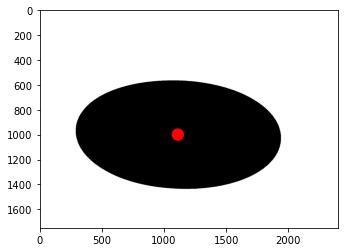

In [25]:
fig, ax = plt.subplots()
ax.imshow(sample_closed,'gray')
#rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')
centerCircle = patches.Circle((centerX, centerY), 50, fc="r")
# Add the patch to the Axes
ax.add_patch(centerCircle)
plt.show()